In [1]:
import numpy as np
import scipy.optimize as so
import matplotlib.pyplot as plt

# Functions: These are solutions that are hidden from the students - they should write them themselves in the Assignment.
def simpleRegPredict(b, x):
    # Takes in b (regression coefficient) and x and returns the ys predicted by a simple linear regression model.
    yp = b[0] + b[1] * x
    return yp

def plotPrediction(b, x, y, predictFcn=simpleRegPredict):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(x, y)
    xp = np.linspace(min(x), max(x), num=50)
    yp = predictFcn(b, xp)
    ax.plot(xp, yp, 'r')

def simpleRegLossRSS(b, x, y):
    predY = simpleRegPredict(b, x)
    res = y - predY
    rss = sum(res**2)
    deriv = np.zeros(2)
    deriv[0] = -2 * sum(res)
    deriv[1] = -2 * sum(res * x)
    return rss, deriv

def simpleRegLossL1(b, x, y):
    predY = simpleRegPredict(b, x)
    res = y - predY
    sad = sum(abs(res))
    deriv = np.zeros(2)
    deriv[0] = -sum(np.sign(res))
    deriv[1] = -sum(np.sign(res) * x)
    return sad, deriv

In [2]:
# The polynomial regression prediction function
def polyRegPredict(b, x):
    yp = np.zeros_like(x,dtype=float)
    for i in range(len(b)):
        yp += b[i] * np.power(x, i)
    return yp

# The polynomial regression loss function
def polyRegLossRSS(b, x, y):
    predY = polyRegPredict(b, x)
    res = y - predY
    rss = np.sum(res ** 2)  # Use np.sum for consistent data types
    grad = np.zeros(len(b), dtype=float)  # Ensure the gradient array has a float data type
    for i in range(len(b)):
        grad[i] = -2 * np.sum(np.power(x, i) * res)  # Use np.power for consistent data types
    return rss


# Polynomial regression fitting function
def polyRegFit(x, y, order=1, ax=[], linestyle='r-', fig=True):
    b0 = np.zeros(order + 1)
    RES = so.minimize(polyRegLossRSS, b0, args=(x, y))
    b = RES.x

    if fig:
        if not ax:
            ax = plotPrediction(b, x, y, polyRegPredict)
        else:
            ax = plotPrediction(b, x, y, polyRegPredict)

    res = y - np.mean(y)
    TSS = np.sum(res**2)
    RSS = polyRegLossRSS(b, x, y)
    R2 = 1 - RSS / TSS

    return R2, b, ax

(np.float64(0.8571428570790263),
 array([-1.99989088,  5.2617501 , -1.57136912,  0.16666002]),
 None)

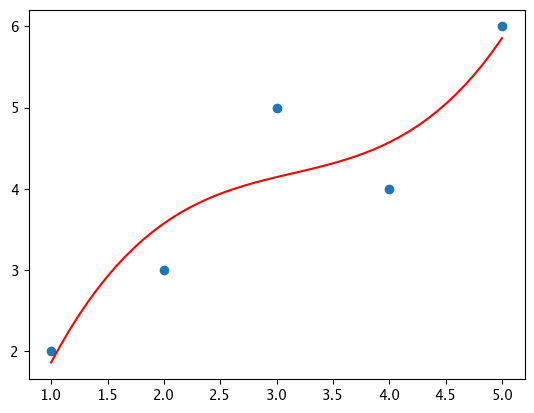

In [3]:
# Example usage:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 4, 6])

b=[0,0,0]

polyRegLossRSS(b, x,y)
loss_fcn = polyRegLossRSS

so.minimize(loss_fcn, b, args=(x, y))
#so.minimize(polyRegLossRSS, 0, args=(x, y), jac=True, options={'gtol': 1e-2})
polyRegFit(x,y,3)

# Lab 8: Mathematical modelling - model estimation
In this tutorial, we will walk through different steps of linear regression modeling introduced in the lecture. We will be working on __The World Happiness Dataset__ from Kaggle website:<br>
https://www.kaggle.com/unsdsn/world-happiness <br>
You will need to modify and combine these steps into several functions for the Assignment.<br>

<font color = 'red'> To do the assignment, use the lecture notes and the tutorial notebook!

In [4]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as so
import pandas as pd
import numpy as np

## Import the dataset

In [5]:
# we will be workin on the dataset from 2019
df = pd.read_csv('2019.csv')

In [6]:
# overal inspection of the dataset
## the first 5 rows
display(df.head())

## print out the number of columns
print(df.columns)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


## Relationship between Happiness score and other variables
Here, like in Lab07, we will take a look at the relationship between __Happiness Score__ and __Healthy life expectancy__, except for this tutorial, I have added data for a ficitonal country, _Zubrowka_ from _Grand Budapest Hotel_ movie, which is going to be the outlier in the data.<br>
Do the scatter plot and you'll see the data for this country!

Text(0.5, 0, 'Healthy life expectancy')

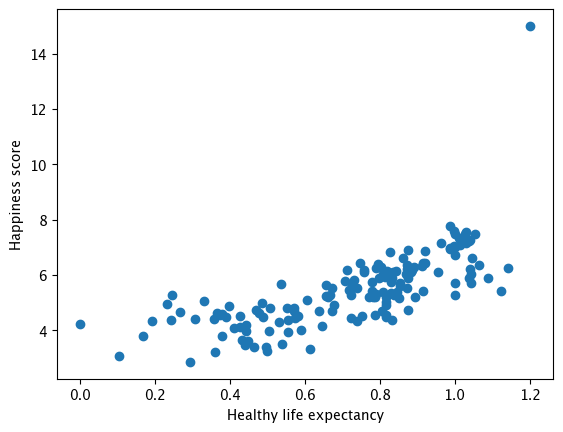

In [7]:
# Healthy life expectancy vs Score
plt.scatter(df['Healthy life expectancy'], df['Score'])
plt.ylabel('Happiness score')
plt.xlabel('Healthy life expectancy')

## 1. Simple Linear Regression
Here, I will introduce a new loss function!

### Simple linear regression using RSS as the loss function
Use the functions from the previous assignment to fit a simple linear regression model to the data using RSS as the loss function!<br>
You need to write the fitting function so that it takes flexible input as the loss function! For the tutorial, I am writting a fitting function with the loss function hard-coded. But remember to modify the fitting function so that it takes in flexible input as the loss function!

In [8]:
# all the functions I need for model fitting
## the prediction function
def simpleRegPredict(b,x):
    yp=b[0]+b[1]*x
    return yp

## the loss function
def simpleRegLossRSS(b,x,y):
    predY = simpleRegPredict(b,x)
    res = y-predY
    rss = sum(res**2)
    deriv = np.zeros(2)
    deriv[0]=-2*sum(res)
    deriv[1]=-2*sum(res*x)
    return (rss,deriv)

## the plotting function
def plotPrediction(b,x,y,predfcn):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x,y)
    xp = np.linspace(min(x),max(x),num=50)
    yp = predfcn(b,xp)
    ax.plot(xp,yp,'r')

## the function to find the best model 
def simpleRegFitRSS(x,y): 
    b0=[np.mean(y),0] ## b0 is [intercept, slope], when b1 = 0 : np.mean(y) would be the intercept 
    RES = so.minimize(simpleRegLossRSS,b0,args=(x,y),jac=True)  ## to minimize loss function 
    print(RES) 
    b=RES.x # Results for the best parameters 
    plotPrediction(b,x,y,simpleRegPredict) 
    res = y-np.mean(y) 
    TSS = sum(res**2)  # Total Sum of Squares 
    RSS,grad = simpleRegLossRSS(b,x,y) ## grad : gradient (vector of partial derivatives). 
    ## gradient[0]：loss function to intercept b0 --> deravative
    ## gradient[1]：loss function to slope b1  -->  deravative
    print(RSS)
    R2 = 1-RSS/TSS # ## the larger the r^2 越大，the better the model
    ## R2: xx % of the variation in the dependent variable is explained by the independent variable(s) in the regression model
    return (R2,b) 

In [9]:
# define x and y
y = df['Score']
x = df['Healthy life expectancy']

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 135.6208640570613
        x: [ 2.566e+00  3.985e+00]
      nit: 5
      jac: [ 3.197e-14  2.842e-14]
 hess_inv: [[ 3.167e-02 -3.911e-02]
            [-3.911e-02  5.370e-02]]
     nfev: 7
     njev: 7
135.6208640570613


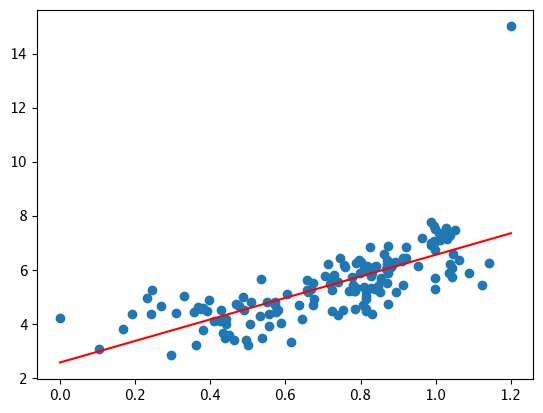

In [10]:
r2, b = simpleRegFitRSS(x,y) 

## fun: the minimum RSS
## success: if the optimization successed 

### Making the regression robust to outliers
To make the regression robust to this outlier datapoint, you will need to use a different loss function: L1 - the absolute deviation. As the name implies, the function calculate the residuals (deviation of the predicted values from the real/observed values), takes the absolute of the residua;s and calculate their sum. Follow the same steps as before:<br>
1. use your prediction function to calculate the predicted values
2. calculate the residuals
3. Get the absolute value of the residuals
4. Calculate the sum <br>

All the above steps are similar to the steps in the RSS loss function, except for 3!<br>

### Calculating the derivatives for L1 loss function (follow the lecture notes)
Your function should also return the derivative array. The derivative for the L1 loss function is calculated differently. Check out the following link to get familiar with how to take the derivative from a function with abs operator (Check out the Derivative section):<br>
https://en.wikipedia.org/wiki/Absolute_value <br>
To make sense of the derivative of the abs of a function, you also need to be familiar with the __sign__ function:<br>
https://en.wikipedia.org/wiki/Sign_function <br>

To implement the sign function in python, use numpy sign function: <br>
https://docs.scipy.org/doc/numpy/reference/generated/numpy.sign.html <br>

Use the lecture notes to see the formulas you need to implement for the derivatives and plug them into your code!<br>
Following is just an illustration of how numpy sign function works!

In [11]:
# lets say you have two arrays:
toy_y = np.array([0, 1, 2, 3, 4, 5, 6])
toy_yp = np.array([0.25, 1.5, 2, 4.5, 4.75, 4.5, 5.8])

# caulcalate the residuals for this toy example
toy_res = toy_y - toy_yp
print(toy_res)

# use np.sign
toy_sgn = np.sign(toy_res) ## print the negative or positive symbol of the number  
print(toy_sgn) 

[-0.25 -0.5   0.   -1.5  -0.75  0.5   0.2 ]
[-1. -1.  0. -1. -1.  1.  1.]


### Not Successful message for L1 loss function
You won't be able to run the following line of code unless you have written the function to calculate L1 loss function!<br>
Pay attention to the Jacobian array, message, and success!

In [12]:
# Use L1 to fit the model 
B0 = np.zeros(2) 
RES = so.minimize(simpleRegLossL1,B0,args=(x,y), jac = True) 
print(RES) 

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 97.03083811088094
        x: [ 2.677e+00  3.874e+00]
      nit: 6
      jac: [ 1.000e+00  3.420e-01]
 hess_inv: [[ 2.077e-03 -1.285e-02]
            [-1.285e-02  8.867e-02]]
     nfev: 100
     njev: 96


<font color = 'orange'> As you can see, the `RES.success` field is __False__ and `RES.message` says: _Desired error not necessarily achieved due to precision loss_. If you are seeing this message, that is probably because the L1 loss function is not differentiable at it's minimum. So the algorithms that use the derivatives (gradients) to minimize this loss function might fail to come out successfully. If you see this message, you can ignore it for now and leave all your functions as they are. OR if you are curious to see how you can solve it, set _jac_ = __False__, modify the L1 loss function so that the dderivatives are calculated but not returned, and then use the documentation for scipy.optimize.minimize to see what are the different options for _method_ and try them out!

### Calculating R2 for model fitting using L1 function
R2 is defined as: R2 = 1 - (RSS/TSS). To get the value for R2, you will need to calculate RSS which is __Residuals sums of squares__. So use the parameters estimated using the SAD loss function and calculate RSS like you did in Assignment 7.

135.8779914309847


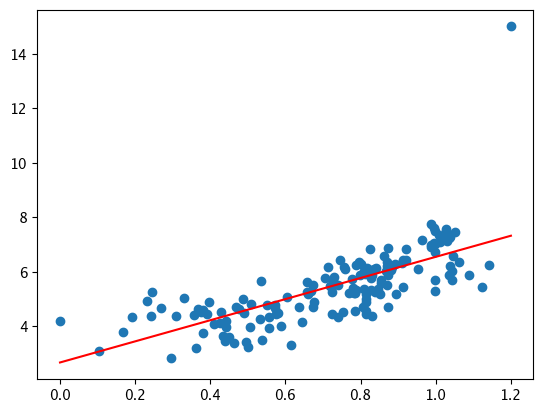

In [13]:
b=RES.x # Results 
plotPrediction(b,x,y,simpleRegPredict) 
res = y-np.mean(y) 
TSS = sum(res**2) 
RSS,grad = simpleRegLossRSS(b,x,y) 
print(RSS) 
R2 = 1-RSS/TSS 

## 2. Nonlinear (polynomial) Regression
In this part of the tutorial, we will be using the position salary dataset (position_salaries.csv). We will model the relationship between years of experience and salary.
For the tutorial, I will show you how to implement a polynomial regression with 3 parameters (yp = b0 + b1*x + b2*x^2). For the assignment, make sure you have made necessary changes so that your functions implement regression for any polynomial!

### Fitting a 3rd degree polynomial 
We will modify the functions from the last assignment to fit a 3rd degree polynomial to the data. Remember, for the assignment, your functions need to work for all polynomials, not just 3rd degree!<br>
For a 3rd degree polynomial, I need to implement this formula:<br>
yp = b0 + (b1 * x) + (b2 * x ** 2) + (b3 * x ** 3)<br>
This formula can also be re-written as:<br>
yp = (b0 * x ** 0) + (b1 * x ** 1) + (b2 * x ** 2) + (b3 * x ** 3)<br>

We will need a for loop to calculate all the terms and add them together to get the final predicted value:

In [14]:
# first take a look at the simpleRegPredict
# def simpleRegPredict(b,x):
#     yp=b[0]+b[1]*x
#     return yp


def polyRegPredict(b, x):
    # Initialize the array that will contain the predicted values
    yp = np.zeros(x.shape)

    # Calculate predicted values using 3rd degree polynomial regression
    for i in range(4):  # considering 0th, 1st, 2nd, and 3rd degree terms
        yp += b[i] * np.power(x, i) 

    return yp


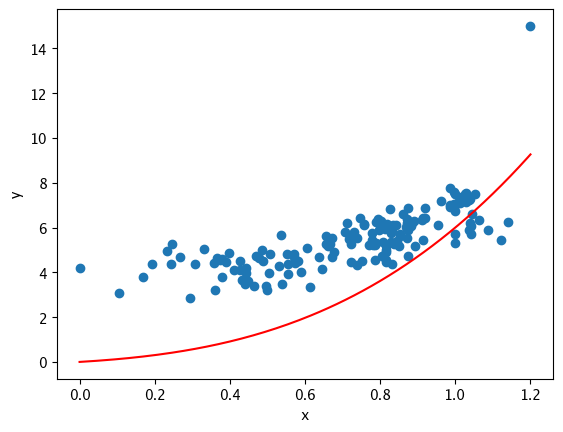

In [15]:
y = df['Score']
x = df['Healthy life expectancy']
b = [0, 1, 2, 3]

# when you are plotting the yvalues predicted by the model,
# it would be better to generate an array of x, use that array to predict the y values
# and plot them

## create an array for x that will be used for prediction
xp = np.linspace(np.min(x),np.max(x),len(x))
yp = polyRegPredict(b,xp)

# do the scatter plot for the actual data
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')

# plot the fitted line
plt.plot(xp, yp, color = 'red')
# print(xp)
# print(yp)

### Writting the RSS loss function for a 3rd degree polynomial
Again, we are trying to write the __Residuals sums of squares__ loss function, which is the sum of the residuals squared!<br>
I will show the steps you need to implement to write a loss function for a nonlinear (polynomial) regression. Again, I will write the function to implement the loss function for 3rd degree polynomial. Make sure you make the necessary changes so that your function works for all the polynomialsa and put all the steps into one function!

#### 1. use the prediction function to get the predicted values

In [16]:
y = df['Score']
x = df['Healthy life expectancy']

yp = polyRegPredict(b, x)
yp #predictied value

0      5.806148
1      5.944176
2      6.400690
3      6.371489
4      5.986011
         ...   
152    1.369756
153    0.762780
154    0.130523
155    0.546067
156    9.264000
Name: Healthy life expectancy, Length: 157, dtype: float64

#### 2. Get the residuals

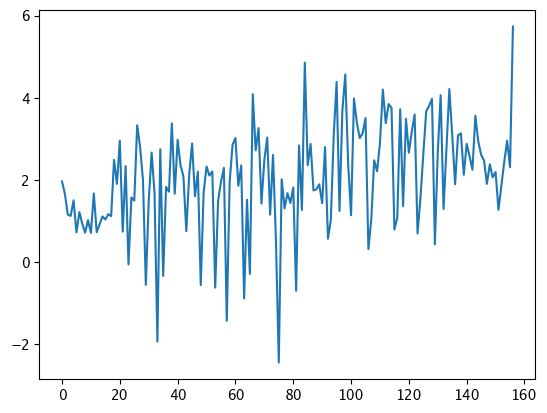

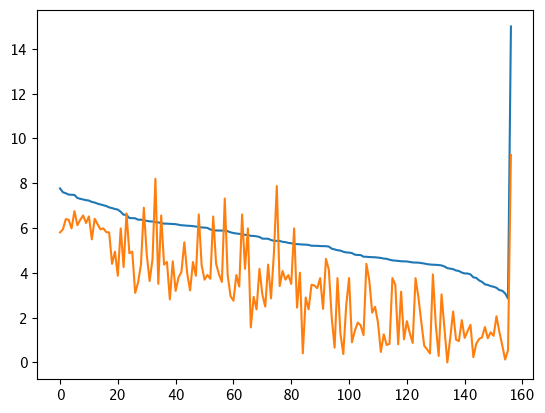

In [17]:
res = y - yp
plt.plot(res)
plt.show()
plt.plot(y)
plt.plot(yp)
plt.show()

#### 3. initialize the derivatives array

In [18]:
# for a 3rd degree polynomial, there are 4 parameters
# so the derivative array will have 4 elements
deriv = np.zeros(4)

#### 4. Fill in the derivative elements using a for loop
The elements of the derivative array should be filled in using a for loop. Taking the partial derivatives, you'll get the following formula for the derivative in respect to each of the parameters: 
* deriv0: derivative in respect to b0: -2 * sum( x^0 * res)
    * keep in mind that x^0 = 1
* deriv1: derivative in respect to b1: -2 * sum( x^1 * res)
* deriv2: derivative in respect to b2: -2 * sum( x^2 * res)
* deriv3: derivative in respect to b3: -2 * sum( x^3 * res) 

Can you find a relationship between the power of x and the parameter index?<br>


## 3. Cross validation
In this part of the tutorial, we are going to implement k-fold (with k = 10) cross validation and fit 3rd degree polynomials to the data. In the assignment, you will need to implement __leave one out cross validation__ which is a specific case of k-fold cross validation! You can use the code for k-fold cross validation to implement leave one out cross validation OR you can write your own code for leave one out!<br>
How many folds we have in __leave one out cross validation?__

The pseudo-code for k-fold cross validation is:
* split the dataframe into k folds
* loop over all the folds and in each iteration:
    * use k - 1 folds as the training dataset to estimate the parameters (b) of the model
    * use one fold as the test dataset. Use b to predict the values for the test dataset and build the complete array of predicted y values (yp)
* calculate RSScv using yp
* calculate TSS = sum(y - np.mean(y))
* calculate R2cv
* calculate R2

Again, you won't be able to follow this part of the tutorial as it uses functions that you need to define within the assignment

### 3.1 split the dataset into k folds
we use numpy array_split to split the dataset into k = 10 folds. Check out the documentation:<br>
https://docs.scipy.org/doc/numpy/reference/generated/numpy.array_split.html

In [19]:
# first create an array that represent the index
ind = np.arange(len(df.index))

# use np.array_split to generate indices for folds
folds = np.array_split(ind, 10)

#### Do some type and shape checking to make sense of the "folds" variable

In [20]:
# type of the variable
print(type(folds)) 

# size and number of elements 
print(len(folds))
# You can see that fold has 10 "elements" each of which is a fold that will be used in cross validation

# type of one element of the fold
print(type(folds[1]))

# print one fold just for checking.
## Here, one element of the "folds" variable represents the indices for the section of the dataframe
print(folds[0])
print(folds[1])
print(folds[9])
#print(folds[10]) # only 10 folds.

<class 'list'>
10
<class 'numpy.ndarray'>
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
[142 143 144 145 146 147 148 149 150 151 152 153 154 155 156]


### 3.2 Initialize the predicted y array
In each iteration, you will be using one fold for testing and the remaining folds for training the model, aka estimating the parameters! Once you estimate the parameters using the training set, you will use them to predict the y values for the testing set. Remember that the testing set was not used in parameter estimation! <br>
In each iteration, you will be using the testing set to predict a part of the predicted values. That's why you need to initialize the predicted values array.

In [21]:
# again use np.zeros to initialize the yp array
yp_cv = np.zeros(len(df.index))
yp_cv

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

### 3.3 Loop through folds and each time set one fold aside for testing
First you need to create a copy of the "folds" variable, because in the loop you will be playing around with the folds variable, each time deleting one element of the array.<br>
We will be using numpy.concatenate to create the indices for training set:<br>
https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html <br>

I will show how one iteration of the loop will be, You will need to put it into a loop.

In [22]:
import numpy as np

def cross_validate(df, folds, polyRegFit, polyRegPredict, order=3):
    yp_cv = np.zeros(len(df))  # Array to store predicted values 

    for f in range(len(folds)):
        # Extract test and train indices
        test_ind = folds[f] ## make the current fth (or nth) fold as the test dataset
        train_ind = np.concatenate([fold for i, fold in enumerate(folds) if i != f], axis=0) ## list other folds and combine them as training dataset

        # Get test and train data
        df_test = df.loc[test_ind]
        df_train = df.loc[train_ind]

        # Extract features and target variables
        xtrain = df_train[ 'Healthy life expectancy'].values  # Convert DataFrame to array
        ytrain = df_train['Score'].values 
        xtest = df_test['Healthy life expectancy'].values

        # Fit polynomial regression model 
        _, b, _ = polyRegFit(xtrain, ytrain, order=order, fig=False) 
        ## x training of features & y training of target data 
        # The argument order=3 specifies a third-degree polynomial regression model.
        # fig=False likely controls whether a visualization is generated during the fitting process (assuming the function can plot results).
        
        # underscores (_) are placeholders for values that are returned but not used. 
        # second value b is the one we care about — it represents the model coefficients.
        
        
        # Predict on test set 
        yp_cv[test_ind] = polyRegPredict(b, xtest)   ## xtest is the array of test data feature values.

    return yp_cv 

# Assuming df is your DataFrame containing the data
yp_cv = cross_validate(df, folds, polyRegFit, polyRegPredict, order=3)
yp_cv 


"""Summary of the Full Process

Data Preparation: Extract training and test data for each fold.
Model Fitting: Fit the polynomial regression model on the training data.
Prediction: Predict values for the test set using polyRegPredict().
Result Storage: Store the predictions in yp_cv at the corresponding test indices.
Output: The function returns yp_cv, an array containing predictions for the entire dataset.

"""

'Summary of the Full Process\n\nData Preparation: Extract training and test data for each fold.\nModel Fitting: Fit the polynomial regression model on the training data.\nPrediction: Predict values for the test set using polyRegPredict().\nResult Storage: Store the predictions in yp_cv at the corresponding test indices.\nOutput: The function returns yp_cv, an array containing predictions for the entire dataset.\n\n'

### 3.4 Calculate cross validated R2
use the yp_cv to calculate R2cv

In [23]:
# TSS
TSS   = sum((y-y.mean())**2) ## measures the total variation in the target variable y. 
## Higher TSS means the data points are more spread out.

# cross validated RSS
RSScv = sum((y-yp_cv)**2)  ## measures total error between the predicted values (yp_cv) and the actual values (y).

# cross validated R2
R2cv  = 1-RSScv/TSS ## R² ranges from 0 to 1: measuring how well the model fits the data.
print("R2cv = %f" % R2cv) ## A higher R² indicates a better model fit. 

R2cv = 0.430997


### 3.5 Calculate R2
Forget about the cross validation for a moment, fit a model to the whole dataset, and calculate R2

In [24]:
# fit and predict 
r,b,ax = polyRegFit(x,y,order = 3,fig=False) ## r: represents some residual or error metric from the fitting process.
yp = polyRegPredict(b,x)  ## polyRegPredict() uses the coefficients b to predict values for the same input data x 

#
TSS = sum((y-y.mean())**2)
RSS = sum((y-yp)**2)
R2  = 1-RSS/TSS
print("R2 = %f" % R2)

R2 = 0.602872
